<img src="./Logo_UNSAM.png" align="right" width="150" />

#### Procesamiento Digital de Señales
# Trabajo Práctico Nº4
#### Lucas Marú

# Enunciado

## Primeras nociones de estimación espectral.


Para una señal 

$$
x(m) = a_1 \cdot \sin(\Omega_1 \cdot m) + n(m)
$$

siendo 

$$
\Omega_1 = \Omega_0 + f_r \cdot \frac{2\pi}{N}, \quad \text{con } \Omega_0 = \frac{\pi}{2}
$$

y las variables aleatorias definidas por:

$$
f_r \sim \mathcal{U}\left(-\tfrac{1}{2}, \tfrac{1}{2} \right), \quad
n(m) \sim \mathcal{N}(0, \sigma^2)
$$

---

Se pide evaluar los siguientes estimadores de $a_1$ y $\Omega_1$:

- Estimador de amplitud:
  $$
  \hat{a}_1 = \left| X_w(\Omega_0) \right| = \left| \mathcal{F}\{x(m) \cdot w_i(m)\} \right|
  $$

- Estimador de frecuencia:
  $$
  \hat{\Omega}_1 = \underset{f}{\arg\max} \ \hat{P}(f)
  $$

---

### Consignas:

- Considere **200 realizaciones** de **1000 muestras** cada una
- Parametrice para **SNR = 3 dB** y **SNR = 10 dB**



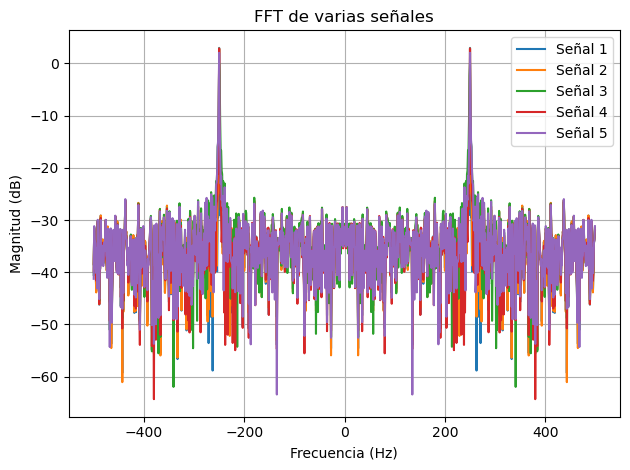

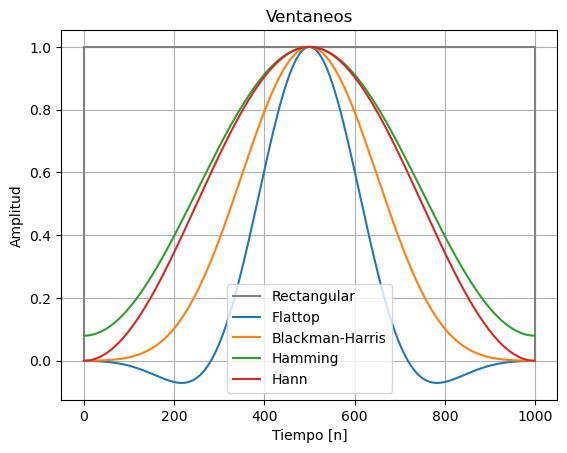

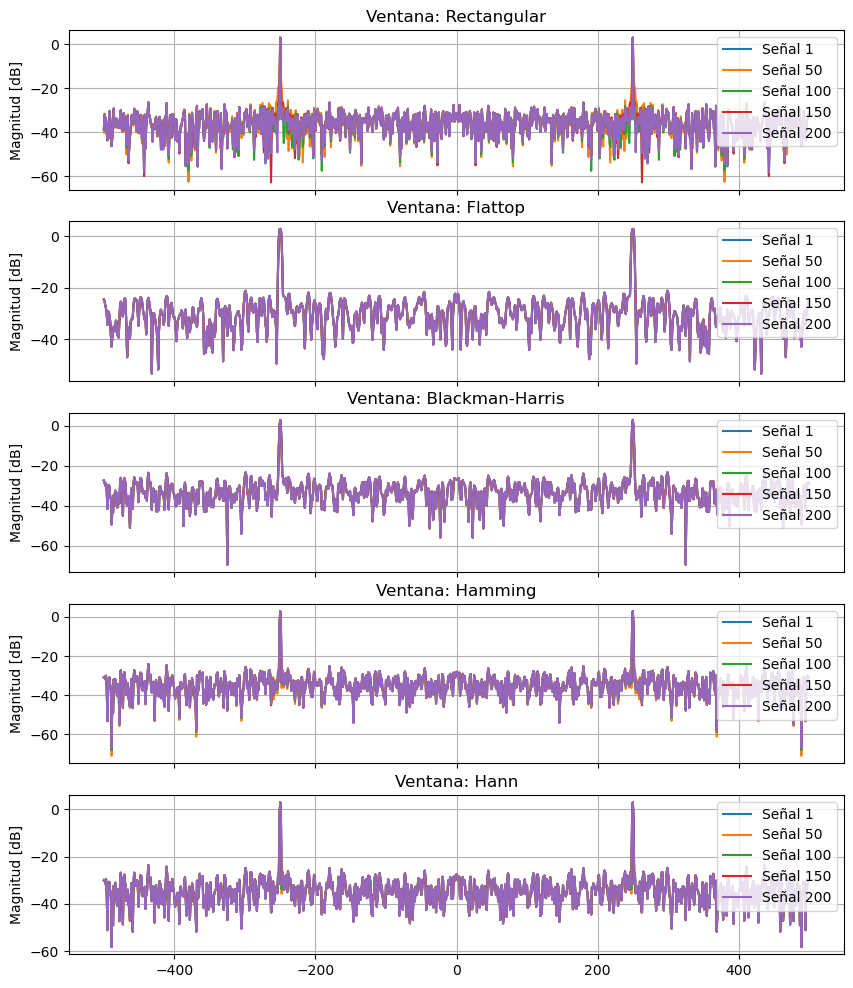

In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Apr  9 18:44:34 2025

@author: lmaru"""

#%% Consigna

"""Para una señal x(k)=a1⋅sen(Ω1⋅k)+n(k) siendo Ω1=Ω0+fr⋅2πN, con Ω0=π2 y las variables aleatorias definidas por
   fr∼U(−1/2,1/2) (uniforme) y n∼N(0,σ2) (normal). 
   Evalúe los siguientes estimadores de a1 y Ω1: 
                                     a1^^=|Xiw(Ω)|=|F{x(k)⋅wi(k)}| y Ω^1=arg maxf{P^}
   Siguiendo las siguientes consignas:
       .Considere 200 realizaciones de 1000 muestras para cada experimento.
       .Parametrice para SNR's de 3 y 10 db.
                                 
"""
"""
TAREA SEMANAL 4 - Primeras nociones de la estimacion espectral
La estimación espectral es una técnica utilizada en el procesamiento de señales para determinar cómo se
distribuye la potencia de una señal en función de la frecuencia.
Cuando una señal no es puramente periódica (por ejemplo, una onda senoidal), sino que contiene componentes 
aleatorios o ruidosos (como una grabación de voz, una señal eléctrica, o una medición física), no es posible 
simplemente aplicar una transformada de Fourier y esperar un resultado limpio. La estimación espectral permite 
hacer esto de forma más robusta.
"""

#%% módulos y funciones a importar
import numpy as np
from scipy.signal.windows import hamming, hann, blackmanharris, flattop
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt
#%% Datos de la simulacion

fs = 1000.0           # frecuencia de muestreo (Hz)
N = 1000            # cantidad de muestras
ts = 1/fs           # tiempo de muestreo
df = fs/N           # resolución espectral

N_Test = 200        # Numero de pruebas

SNR = 10            # Signal to Noise Ratio 
 
"""De la definición de SNR y asumiendo potencia de la señal normalizada llego 
al valor que debe tener la potencia de ruido para respetar el SNR requerido.
De esta manera tengo resuelta la experiencia para ambas SNR prescriptas."""
Sigma2 = 10**(-10/SNR) #Potencia de ruido

Omega_0 = fs/4      # Nos ponemos a mitad de banda digital
"""Esto viene prescripto en el enunciado y tiene la intención de generar
frecuencias que oscilen +- medio bin del centro de banda digital."""
#%% Genero mi matriz de 1000x200 de la senoidal

"""Defino la amplitud que ya calculamos en otras TS para que la potencia de las
200 senoidales quede normalizada"""
A1 = np.sqrt(2) 

"""Genero el vector de 1x200 frecuencias, 200 valores extraidos de una 
distribución uniforme de -1,2 a 1/2 y le fuerzo las dimensiones con reshape"""
fr = np.random.uniform(-1/2,1/2,N_Test).reshape(1,N_Test)
  
Omega_1 = Omega_0 + fr*df                       # Genero mi Omega_1 de 1x200

# Genero vector de tiempo para meterlo como mi matriz de 1000x200 en el seno 
tt = np.linspace(0, (N-1)*ts, N).reshape(N,1)    #vector columna de 1000x1
tt = np.tile(tt, (1, N_Test))  # tile repite esa columna 200 veces, queda de 1000x200

""" Al mutiplicar omega_1 con tt numpy por defecto multiplica término a término
como tt es de 1000x200 entiende que tiene que expandir dimensionalmente a 
omega_1 para poder hacer el producto término a término, lo hace automáticamente
y por eso S es de 1000x200 
"""
S = A1 * np.sin(2 * np.pi * Omega_1 * tt)

"""Grafico la columna 0 del tiempo y la columna cero de S, para corroborar que 
tengo una senoidal pura de una frecuenia de alrededor de 250hz en cada columa, 
pero en cambio veo algo como una envolvente que módula la señal,pero si pongo 
omega_0=1 veo lo que espero ver"""
############################GRAFICO DE CHEQUEO#################################
# plt.figure(1)
# plt.plot(tt[:,0], S[:,0:5])  # ahora sí, una senoidal limpia
# #plt.stem(tt[:,0], S[:,0],basefmt=" ")
# plt.xlabel("Tiempo [s]")
# plt.ylabel("Amplitud")
# plt.title("Senoidal número 1")
# plt.grid(True)
#%% Genero el ruido para la señal
# Para poder general la señal de ruido, tenemos que tener una distribucion normal con un N(o,sigma)

Media = 0                   # Media
SD_Sigma = np.sqrt(Sigma2)  # Desvio standar a partir de la pot calculada antes 

nn = np.random.normal(Media, SD_Sigma, N).reshape(N,1)  # Genero señal de ruido 1000x1
nn = np.tile(nn, (1,N_Test))                            # tile repite esa columna 200 veces, queda de 1000x200


#%% Sumo la matriz de senoidales con el ruido
Signal = S + nn
"""Grafico la columna 0 del tiempo y la columna cero de Signal, para corroborar 
que se haya añadido el ruido. Se ve el ruido, pero con el mismo patrón que cuando 
grafique la senoidal pura, se ve como una envolvente que módula la señal, 
nuevamente si cambio a omega_0=1 veo algo más razonable"""
############################GRAFICO DE CHEQUEO#################################
# plt.figure(1)
# plt.plot(tt[:,0], Signal[:,0:5])  # ahora sí, una senoidal limpia
# plt.xlabel("Tiempo [s]")
# plt.ylabel("Amplitud")
# plt.title("Senoidal + ruido")
# plt.grid(True)

#%% Calcular la FFT de cada señal en la matriz Signal

XF = fft(Signal, axis=0)  # FFT en cada columna (cada señal) eso lo garantizo con el axis
XF = fftshift(XF, axes=0) # Centramos el espectro, ahora axes garantiza el reordenamiento vertical
XF_norm = XF/np.max(np.abs(XF)) #normalizo
frec = np.arange(-fs/2, fs/2, df)  # Eje de frec apropiado para el orden que impone fftshift

#%% Graficamos la magnitud de la FFT para algunas señales
for i in range(5): #no encuentro otra manera de poner las etiquetas sin el for
    plt.plot(frec, 10 * np.log10(2 * np.abs(XF_norm[:, i])**2), label=f'Señal {i+1}')
    
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud (dB)") 
plt.title("FFT de varias señales")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#%% Genero las ventanas flattop, blackmanharris, hamming y hann
w_rect = np.ones((N,1))  # Ventana rectangular explícitada
w_flattop = flattop(N).reshape(N,1)
w_blackmanharris = blackmanharris(N).reshape(N,1)
w_hamming = hamming(N).reshape(N,1)
w_hann = hann(N).reshape(N,1)

# Graficar ventanas
n=np.arange(N)
plt.figure(2)
plt.plot(n, w_rect, color='gray' ,label='Rectangular')
plt.vlines(x=0, ymin=0, ymax=1, color='gray')
plt.vlines(x=N-1, ymin=0, ymax=1, color='gray')
plt.plot(n, w_flattop, label='Flattop')
plt.plot(n, w_blackmanharris, label='Blackman-Harris')
plt.plot(n, w_hamming, label='Hamming')
plt.plot(n, w_hann, label='Hann')
plt.title('Ventaneos')
plt.xlabel('Tiempo [n]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
#%% Enventaneo la señal

W_Flattop = Signal *w_flattop
W_Flattop = fft(W_Flattop , axis=0)
W_Flattop = fftshift(W_Flattop , axes=0)  # Centramos el espectro
W_Flattop_norm = W_Flattop / np.max(np.abs(W_Flattop))


W_Blackmanharris = Signal *w_blackmanharris
W_Blackmanharris = fft(W_Blackmanharris , axis=0)
W_Blackmanharris = fftshift(W_Blackmanharris , axes=0)  # Centramos el espectro
W_Blackmanharris_norm = W_Blackmanharris / np.max(np.abs(W_Blackmanharris))

W_Hamming = Signal *w_hamming
W_Hamming = fft(W_Hamming , axis=0)
W_Hamming = fftshift(W_Hamming , axes=0)  # Centramos el espectro
W_Hamming_norm = W_Hamming / np.max(np.abs(W_Hamming))

W_Hann = Signal *w_hann
W_Hann = fft(W_Hann , axis=0)
W_Hann = fftshift(W_Hann , axes=0)  # Centramos el espectro
W_Hann_norm = W_Hann / np.max(np.abs(W_Hann))


#%% Visualización

#almaceno matrices en un diccionario
ventanas = {
    'Rectangular': XF_norm,
    'Flattop': W_Flattop_norm,
    'Blackman-Harris': W_Blackmanharris_norm,
    'Hamming': W_Hamming_norm,
    'Hann': W_Hann_norm
}

"""Defino el número de señales y creo un vector con 5 valores entre 0 y 199 
equiespaciados y enteros""" 
num_senales = 5
indices = np.linspace(0, N_Test-1, num_senales, dtype=int)

"""Creo 5 subplots de una sola columna y almaceno sus atributos en fig y axs.
Además defino el tamaño y con sharex comparten el eje x para que se alineen."""
fig, axs = plt.subplots(len(ventanas), 1, figsize=(10, 12), sharex=True)

"""Con un for recorro cada ax en axs y lo zipeo con el diccionario ""ventanas"
esto me devuelve unos ejes con un nombre y su correspondiente matriz normalizada
que recorro con otro for para generar los graficos de la cant de señales definida.
"""
for ax, (nombre, matriz_fft) in zip(axs, ventanas.items()):
    for i in indices:
        ax.plot(frec, 10 * np.log10(2 * np.abs(matriz_fft[:, i])**2), label=f'Señal {i+1}')
    ax.set_title(f"Ventana: {nombre}")
    ax.set_ylabel("Magnitud [dB]")
    ax.grid(True)
    ax.legend()

#%% Estimador de amplitud
"""Resto a todo el vector de frec[-500,-499,...,0,1,...,250,...,499] Omega_0 que es 250hz, entonces el vector 
queda frec-250:[-750,-749,...,-250,-249,...,0,...,249], a esto le tomo el módulo, es decir la distancia entre 
cada valor de de frecuencia con 250 => abs(frec-250):[750,749,...,250,249,...,0,...,249] y por último argmin
devuelve el indice del valor mínimo del array que es el que ahora da 0 y que antes era 250.Tiene lógica porque 
para usar fftshift ordenamos el array de frecuencia de [-500,500) como el indice 0 es -500 el indice 750 va a 
ser el que corresponde a 250hz, en este caso ayuda que la df es 1 pero podrìa no ser entera y aún así este 
método funcionaría"""
idx_Omega0 = np.argmin(np.abs(frec - Omega_0))  #Busco el indice que corresponde a omega_0 que da 750
 

"""Calculo el módulo para cada espectro ventaneado de la fila 750 y para toda las columnas, ahi voy a tener 
el valor del estimador para cada una de las 200 señales."""
a1_rect = np.abs(XF[idx_Omega0, :])
a1_flattop = np.abs(W_Flattop[idx_Omega0, :])
a1_blackmanharris = np.abs(W_Blackmanharris[idx_Omega0, :])
a1_hamming = np.abs(W_Hamming[idx_Omega0, :])
a1_hann = np.abs(W_Hann[idx_Omega0, :])